In [ ]:
import numpy as np
import pandas as pd
import statistics
from scipy import stats
import scikit_posthocs as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rvs4 = stats.lognorm.rvs(s=1, loc=-3, scale=2, size=100, random_state=1234)
rvs5 = stats.lognorm.rvs(s=1, loc=-3, scale=2, size=100, random_state=123)
rvs6 = stats.lognorm.rvs(s=1, loc=-1, scale=2, size=100, random_state=123)

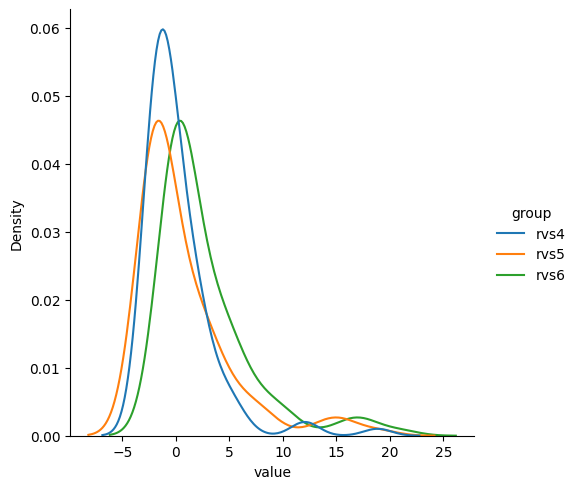

In [3]:
df_rvs = pd.DataFrame({
    'value':
        np.append(np.append(rvs4, rvs5), rvs6),
    'group':
        np.append(
            np.append(np.repeat("rvs4",
                                len(rvs4)), np.repeat("rvs5", len(rvs5))),
            np.repeat("rvs6", len(rvs6)))
})
sns.displot(data=df_rvs, x='value', hue='group', kind='kde')

In [4]:
f_score, p_value = stats.kruskal(rvs4, rvs5, rvs6)
print("F-score:", f_score)
print("p-value:", p_value)

F-score: 46.02544850498339
p-value: 1.0132132104951073e-10


In [5]:
sp.posthoc_conover(df_rvs, val_col='value', group_col='group')

,rvs4,rvs5,rvs6
rvs4,1.000000e+00,9.542575e-01,6.236396e-10
rvs5,9.542575e-01,1.000000e+00,8.667012e-10
rvs6,6.236396e-10,8.667012e-10,1.000000e+00
